Model loaded successfully from: mlflow-artifacts:/324999239046033583/d01a7ca7867e43169a2d21693b4b89bb/artifacts/random_forest_model
Dataset Loaded Successfully
   age     fare  class_Second  class_Third  sex_male  embarked_Q  embarked_S  \
0   22   7.2500             0            1         1           0           1   
1   38  71.2833             0            0         0           0           0   
2   26   7.9250             1            0         1           1           0   
3   35  53.1000             0            0         1           0           1   
4   28   8.4583             1            0         1           0           1   

   who_man  who_woman  alone  survived  
0        1          0      0         0  
1        0          1      0         1  
2        1          0      1         1  
3        1          0      0         1  
4        1          0      1         0  
Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       

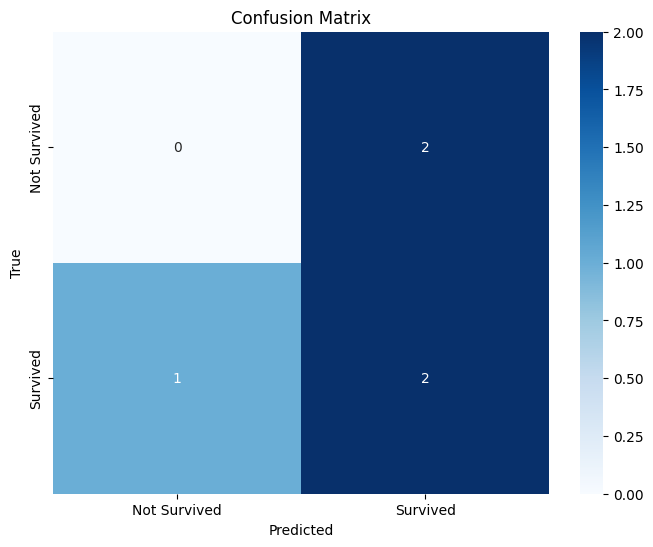

In [2]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Set the tracking URI
mlflow.set_tracking_uri("http://localhost:5001")  # Replace with your MLflow server URI


# Model artifact URI
model_uri = "mlflow-artifacts:/324999239046033583/d01a7ca7867e43169a2d21693b4b89bb/artifacts/random_forest_model"

# Load the trained model
model = mlflow.sklearn.load_model(model_uri)
print("Model loaded successfully from:", model_uri)

# Load your dataset for evaluation (replace with your dataset path)
# Example: titanic_eval.csv contains test features and true labels
data_path = "titanic_eval.csv"  # Replace with your dataset's path
data = pd.read_csv(data_path)

# Inspect the dataset
print("Dataset Loaded Successfully")
print(data.head())

# Separate features (X) and target (y) from the dataset
X = data.drop(columns=["survived"])  # Replace "survived" with your actual target column name
y_true = data["survived"]  # Replace with your actual target column name

# Standardize the features (ensure this matches preprocessing during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Make predictions using the loaded model
y_pred = model.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
